**Importing Working libraries**

In [2]:
import pandas as pd  # Pandas Library for Dataframe
import numpy as np  # Numpy Library for Numerical Calculations
import matplotlib.pyplot as plt  # Matplotlib and for Plottings
import seaborn as sns

**Loading the Datasets and Finding some informations about data**

**Load Datasets**

In [108]:
aqi_data=pd.read_csv("D:\\data science\\Air Purifier Development\\aqi.csv")
idsp_data= pd.read_csv("D:\\data science\\Air Purifier Development\\idsp.csv",encoding='latin1')
vahan_data= pd.read_csv("D:\\data science\\Air Purifier Development\\vahan.csv")
popu_data= pd.read_csv("D:\\data science\\Air Purifier Development\\population_projection.csv")

**Common Analysis**

In [7]:
aqi_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235785 entries, 0 to 235784
Data columns (total 9 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   date                           235785 non-null  object 
 1   state                          235785 non-null  object 
 2   area                           235785 non-null  object 
 3   number_of_monitoring_stations  235785 non-null  int64  
 4   prominent_pollutants           235785 non-null  object 
 5   aqi_value                      235785 non-null  int64  
 6   air_quality_status             235785 non-null  object 
 7   unit                           235785 non-null  object 
 8   note                           0 non-null       float64
dtypes: float64(1), int64(2), object(6)
memory usage: 16.2+ MB


In [8]:
aqi_data.isnull().sum()

date                                  0
state                                 0
area                                  0
number_of_monitoring_stations         0
prominent_pollutants                  0
aqi_value                             0
air_quality_status                    0
unit                                  0
note                             235785
dtype: int64

In [9]:
idsp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6474 entries, 0 to 6473
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   year                    6474 non-null   int64 
 1   week                    6474 non-null   int64 
 2   outbreak_starting_date  6474 non-null   object
 3   reporting_date          5455 non-null   object
 4   state                   6474 non-null   object
 5   district                6473 non-null   object
 6   disease_illness_name    6469 non-null   object
 7   status                  6474 non-null   object
 8   cases                   6474 non-null   int64 
 9   deaths                  6474 non-null   int64 
 10  unit                    6474 non-null   object
 11  note                    6 non-null      object
dtypes: int64(4), object(8)
memory usage: 607.1+ KB


In [10]:
idsp_data.isnull().sum()

year                         0
week                         0
outbreak_starting_date       0
reporting_date            1019
state                        0
district                     1
disease_illness_name         5
status                       0
cases                        0
deaths                       0
unit                         0
note                      6468
dtype: int64

In [11]:
vahan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64841 entries, 0 to 64840
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           64841 non-null  int64  
 1   month          64841 non-null  object 
 2   state          64841 non-null  object 
 3   rto            64841 non-null  object 
 4   vehicle_class  64841 non-null  object 
 5   fuel           64841 non-null  object 
 6   value          64841 non-null  int64  
 7   unit           64841 non-null  object 
 8   note           0 non-null      float64
dtypes: float64(1), int64(2), object(6)
memory usage: 4.5+ MB


In [12]:
vahan_data.isnull().sum()

year                 0
month                0
state                0
rto                  0
vehicle_class        0
fuel                 0
value                0
unit                 0
note             64841
dtype: int64

In [98]:
popu_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8892 entries, 0 to 8891
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    8892 non-null   int64  
 1   month   8892 non-null   object 
 2   state   8892 non-null   object 
 3   gender  8892 non-null   object 
 4   value   8892 non-null   int64  
 5   unit    8892 non-null   object 
 6   note    0 non-null      float64
dtypes: float64(1), int64(2), object(4)
memory usage: 486.4+ KB


In [100]:
popu_data.isnull().sum()

year         0
month        0
state        0
gender       0
value        0
unit         0
note      8892
dtype: int64

In [112]:
# Preprocess dates and add year/month columns
aqi_data["date"] = pd.to_datetime(aqi_data["date"],dayfirst=True,format="%d-%m-%Y")
aqi_data['year'] = aqi_data['date'].dt.year
aqi_data['month'] = aqi_data['date'].dt.month
idsp_data['outbreak_starting_date'] = pd.to_datetime(idsp_data['outbreak_starting_date'], format='%d-%m-%Y', errors='coerce')
idsp_data['year'] = idsp_data['outbreak_starting_date'].dt.year
idsp_data['month'] = idsp_data['outbreak_starting_date'].dt.month
# For vahan and popu, assume month is string or number; convert to int if needed
vahan_data['month'] = pd.to_datetime(vahan_data['month'], format='%B', errors='coerce').dt.month
popu_data['month'] = pd.to_datetime(popu_data['month'], format='%B', errors='coerce').dt.month

*1.) Top areas with poor AQI*

In [17]:
poor_state = pd.DataFrame(aqi_data[aqi_data["aqi_value"]>150][["state","area"]].value_counts().reset_index())

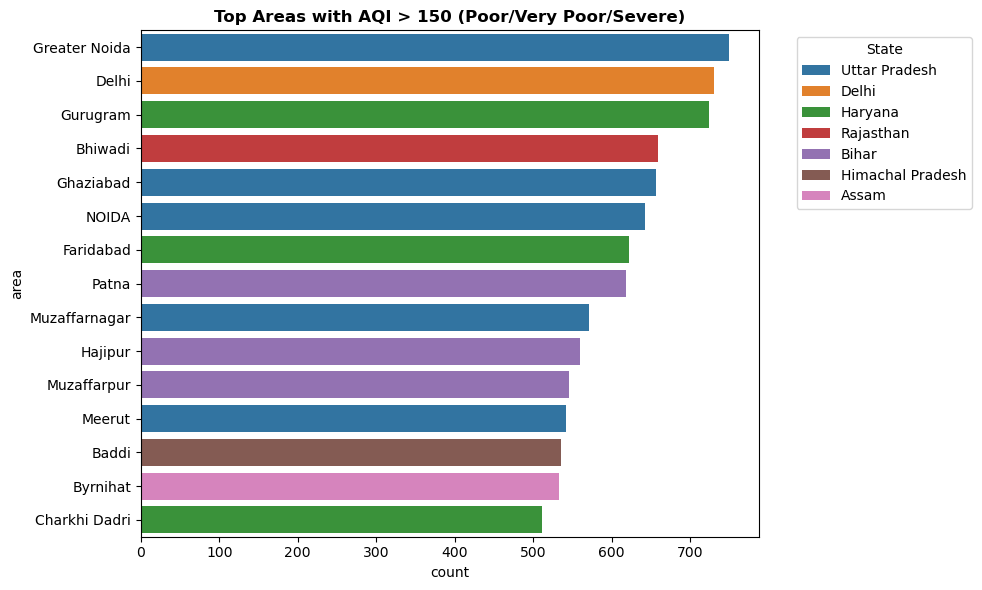

In [18]:
# Sort top 15 worst-hit areas
top_poor = poor_state.sort_values("count", ascending=False).head(15)

plt.figure(figsize=(10,6))
sns.barplot(data=top_poor,x="count", y="area", hue="state", dodge=False)
plt.title("Top Areas with AQI > 150 (Poor/Very Poor/Severe)", fontsize=12, weight="bold")
plt.legend(title="State", bbox_to_anchor=(1.05,1), loc="upper left")
plt.tight_layout()
plt.show()


*2.) List the top 5 and bottom 5 areas with highest average AQI. (Consider areas which contains data from last 6 months: December 2024 to May 2025)*

In [20]:
# Filter data for Dec 2024 – May 2025
mask = (aqi_data['date'] >= '2024-12-01') & (aqi_data['date'] <= '2025-05-31')
aqi_6mo = aqi_data.loc[mask]

# Group by state, city, and area → compute average AQI
area_avg = (aqi_6mo.groupby(['state', 'area'])['aqi_value'].mean().reset_index(name='avg_aqi').sort_values('avg_aqi', ascending=False))

# Top 5 and Bottom 5
top_5_areas = pd.DataFrame(area_avg.head(5))
bottom_5_areas = pd.DataFrame(area_avg.tail(5))

print("Top 5 Areas:\n", top_5_areas)
print("\nBottom 5 Areas:\n", bottom_5_areas)

Top 5 Areas:
       state         area     avg_aqi
11    Assam     Byrnihat  284.194915
50    Delhi        Delhi  238.920000
27    Bihar      Hajipur  233.666667
59  Haryana  Bahadurgarh  226.437500
66  Haryana     Gurugram  204.143836

Bottom 5 Areas:
           state            area    avg_aqi
90    Karnataka  Chamarajanagar  44.807692
111   Karnataka      Vijayapura  44.328767
103   Karnataka        Madikeri  42.951049
242  Tamil Nadu   Palkalaiperur  42.794872
250  Tamil Nadu     Tirunelveli  33.310078


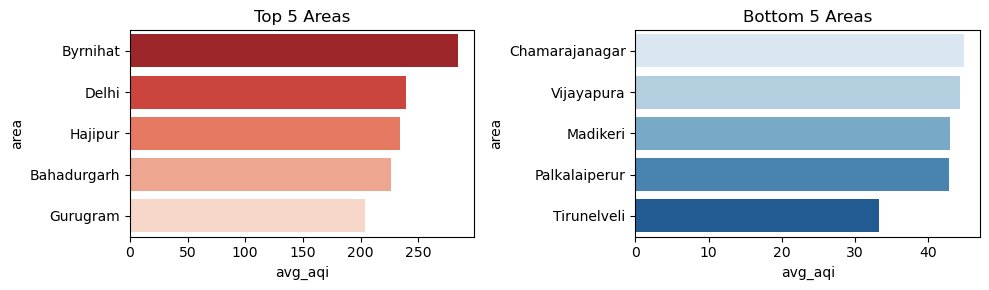

In [21]:
# show in graph plot
plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
plt.title("Top 5 Areas")
sns.barplot(x='avg_aqi', y='area',hue='area', data=top_5_areas, palette='Reds_r',legend=False)
plt.subplot(1,2,2)
plt.title("Bottom 5 Areas")
sns.barplot(x='avg_aqi', y='area',hue ='area', data=bottom_5_areas, palette='Blues',legend=False)
plt.tight_layout()
plt.show()

*3.) List out top 2 and bottom 2 prominent pollutants for each state of southern India. (Consider data post covid: 2022 onwards)*

In [23]:
# List of southern states
southern_states = ['Andhra Pradesh', 'Karnataka', 'Kerala', 'Tamil Nadu', 'Telangana', 'Puducherry']

# Filter AQI data for post-COVID years (2022 onwards)
filtered_q2 = aqi_data[(aqi_data['year'] >= 2022) & aqi_data['state'].isin(southern_states)]
pollutant_counts = filtered_q2.groupby(['state', 'prominent_pollutants']).size().reset_index(name='count')

# Collect results
results = []

for state in southern_states:
    state_data = pollutant_counts[pollutant_counts['state'] == state].sort_values('count', ascending=False)
    if not state_data.empty:
        top2 = state_data.head(2)['prominent_pollutants'].tolist()
        bottom2 = state_data.tail(2)['prominent_pollutants'].tolist()
        results.append({'state': state,'top2_pollutants': top2,'bottom2_pollutants': bottom2})

# Convert to DataFrame
final_df = pd.DataFrame(results)
print(final_df)

            state     top2_pollutants                bottom2_pollutants
0  Andhra Pradesh       [PM10, PM2.5]  [PM10,NO2,PM2.5,O3, PM10,NO2,O3]
1       Karnataka          [PM10, CO]                  [NO2,O3, SO2,O3]
2          Kerala       [PM10, PM2.5]                      [SO2, CO,O3]
3      Tamil Nadu       [PM10, PM2.5]  [PM10,NH3,CO, PM10,NO2,PM2.5,O3]
4       Telangana  [PM2.5,PM10, PM10]                  [PM2.5,NO2, NO2]
5      Puducherry          [PM10, O3]                       [PM2.5, CO]


*4.) Does AQI improve on weekends vs weekdays in Indian metro cities (Delhi, Mumbai, Chennai, Kolkata, Bengaluru, Hyderabad, Ahmedabad, Pune)?*

In [25]:
# Focus on 8 metro cities
metros = ['Delhi', 'Mumbai', 'Chennai', 'Kolkata', 'Bengaluru', 'Hyderabad', 'Ahmedabad', 'Pune']

# Keep only last 1 year data
max_date = aqi_data['date'].max()
start_q3 = max_date - pd.Timedelta(days=365)
filtered_q3 = aqi_data[(aqi_data['date'] >= start_q3) & (aqi_data['date'] <= max_date) & aqi_data['area'].isin(metros)].copy()  # Added .copy()
filtered_q3.loc[:, 'weekday'] = filtered_q3['date'].dt.weekday
filtered_q3.loc[:, 'is_weekend'] = filtered_q3['weekday'] >= 5

# Group by city and weekend/weekday
avg_weekday = filtered_q3[~filtered_q3['is_weekend']].groupby('area')['aqi_value'].mean()
avg_weekend = filtered_q3[filtered_q3['is_weekend']].groupby('area')['aqi_value'].mean()
improvement = ((avg_weekday - avg_weekend) / avg_weekday * 100).fillna(0)

print("Q3 Weekday Avg AQI:\n", avg_weekday)
print("Q3 Weekend Avg AQI:\n", avg_weekend)
print("Q3 % Improvement:\n", improvement)

Q3 Weekday Avg AQI:
 area
Ahmedabad    114.716475
Bengaluru     71.896552
Chennai       71.245211
Delhi        208.697318
Hyderabad     77.923372
Kolkata       91.727969
Mumbai        91.049808
Pune         101.954023
Name: aqi_value, dtype: float64
Q3 Weekend Avg AQI:
 area
Ahmedabad    116.038462
Bengaluru     72.384615
Chennai       68.442308
Delhi        198.923077
Hyderabad     79.009615
Kolkata       91.259615
Mumbai        92.653846
Pune         100.846154
Name: aqi_value, dtype: float64
Q3 % Improvement:
 area
Ahmedabad   -1.152395
Bengaluru   -0.678842
Chennai      3.934163
Delhi        4.683453
Hyderabad   -1.393990
Kolkata      0.510590
Mumbai      -1.761715
Pune         1.086636
Name: aqi_value, dtype: float64


*5.) Which months consistently show the worst air quality across Indian states — (Consider top 10 states with high distinct areas)*

In [27]:
# Question 4: Months consistently show worst air quality across top 10 states with high distinct areas
distinct_areas = aqi_data.groupby('state')['area'].nunique().sort_values(ascending=False).head(10)
top_states = distinct_areas.index
filtered_q4 = aqi_data[aqi_data['state'].isin(top_states)]
monthly_avg = filtered_q4.groupby(['state', 'month'])['aqi_value'].mean().reset_index()
worst_months_per_state = monthly_avg.loc[monthly_avg.groupby('state')['aqi_value'].idxmax()]['month']
consistent_months = worst_months_per_state.value_counts().sort_values(ascending=False)
print("Q4 Consistent Worst Months:\n")
consistent_months = pd.DataFrame(consistent_months)
consistent_months

Q4 Consistent Worst Months:



,count
month,
11,5
1,3
12,1
2,1


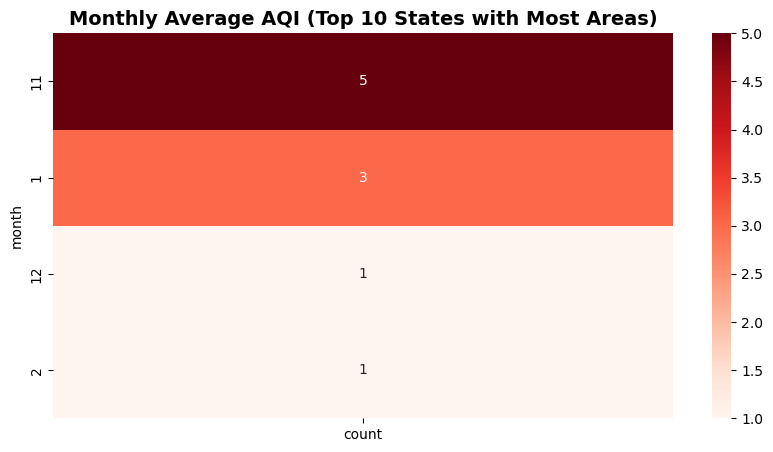

In [28]:
# Plot heatmap
plt.figure(figsize=(10,5))
sns.heatmap(consistent_months, cmap="Reds",annot=True)
plt.title("Monthly Average AQI (Top 10 States with Most Areas)", fontsize=14, weight="bold")
plt.show()

*6.) For the city of Bengaluru, how many days fell under each air quality category (e.g., Good, Moderate, Poor, etc.) between March and May 2025?*

In [30]:
# Filter for Bengaluru between March–May 2025
filtered_q5 = aqi_data[(aqi_data['area'] == 'Bengaluru') & (aqi_data['date'] >= '2025-03-01') & (aqi_data['date'] <= '2025-05-31')]
# Count days under each air quality status
category_counts = filtered_q5['air_quality_status'].value_counts()
category_counts = pd.DataFrame(category_counts)
category_counts

,count
air_quality_status,
Satisfactory,48
Moderate,13


*7.) List the top two most reported disease illnesses in each state over the past three years, along with the corresponding average Air Quality Index*

In [32]:
# Filter disease dataset (last 3 years)
current_year = idsp_data['year'].max()
last_3_years = list(range(current_year - 2, current_year + 1))
disease_recent = idsp_data[idsp_data['year'].isin(last_3_years)]

# Top 2 diseases per state
disease_summary = (disease_recent.groupby(['state', 'disease_illness_name'])['cases'].sum().reset_index()
    .sort_values(['state', 'cases'], ascending=[True, False])
)

top2_diseases = (disease_summary.groupby('state').head(2).reset_index(drop=True))

# Average AQI per state (last 3 years)
cutoff_date = aqi_data['date'].max() - pd.DateOffset(years=3)
aqi_recent = aqi_data[aqi_data['date'] >= cutoff_date]

state_aqi = (aqi_recent.groupby('state')['aqi_value'].mean().reset_index().rename(columns={'aqi_value': 'avg_aqi'}))

# Merge
final_result = top2_diseases.merge(state_aqi, on='state', how='left')

final_result.head(60)

,state,disease_illness_name,cases,avg_aqi
0,Andaman and Nicobar Islands,Acute Diarrheal Disease,94,57.706897
1,Andaman and Nicobar Islands,Fever with Rash,8,57.706897
2,Andhra Pradesh,Acute Diarrheal Disease,3189,77.903189
3,Andhra Pradesh,Cholera,1081,77.903189
4,Arunachal,Rabies,1,NaN
5,Arunachal Pradesh,Acute Diarrheal Disease,290,54.453649
6,Arunachal Pradesh,Mumps,133,54.453649
7,Assam,Acute Diarrheal Disease,2683,114.407809
8,Assam,Food Poisoning,1791,114.407809
9,Bihar,Acute Diarrheal Disease,1316,155.996001


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


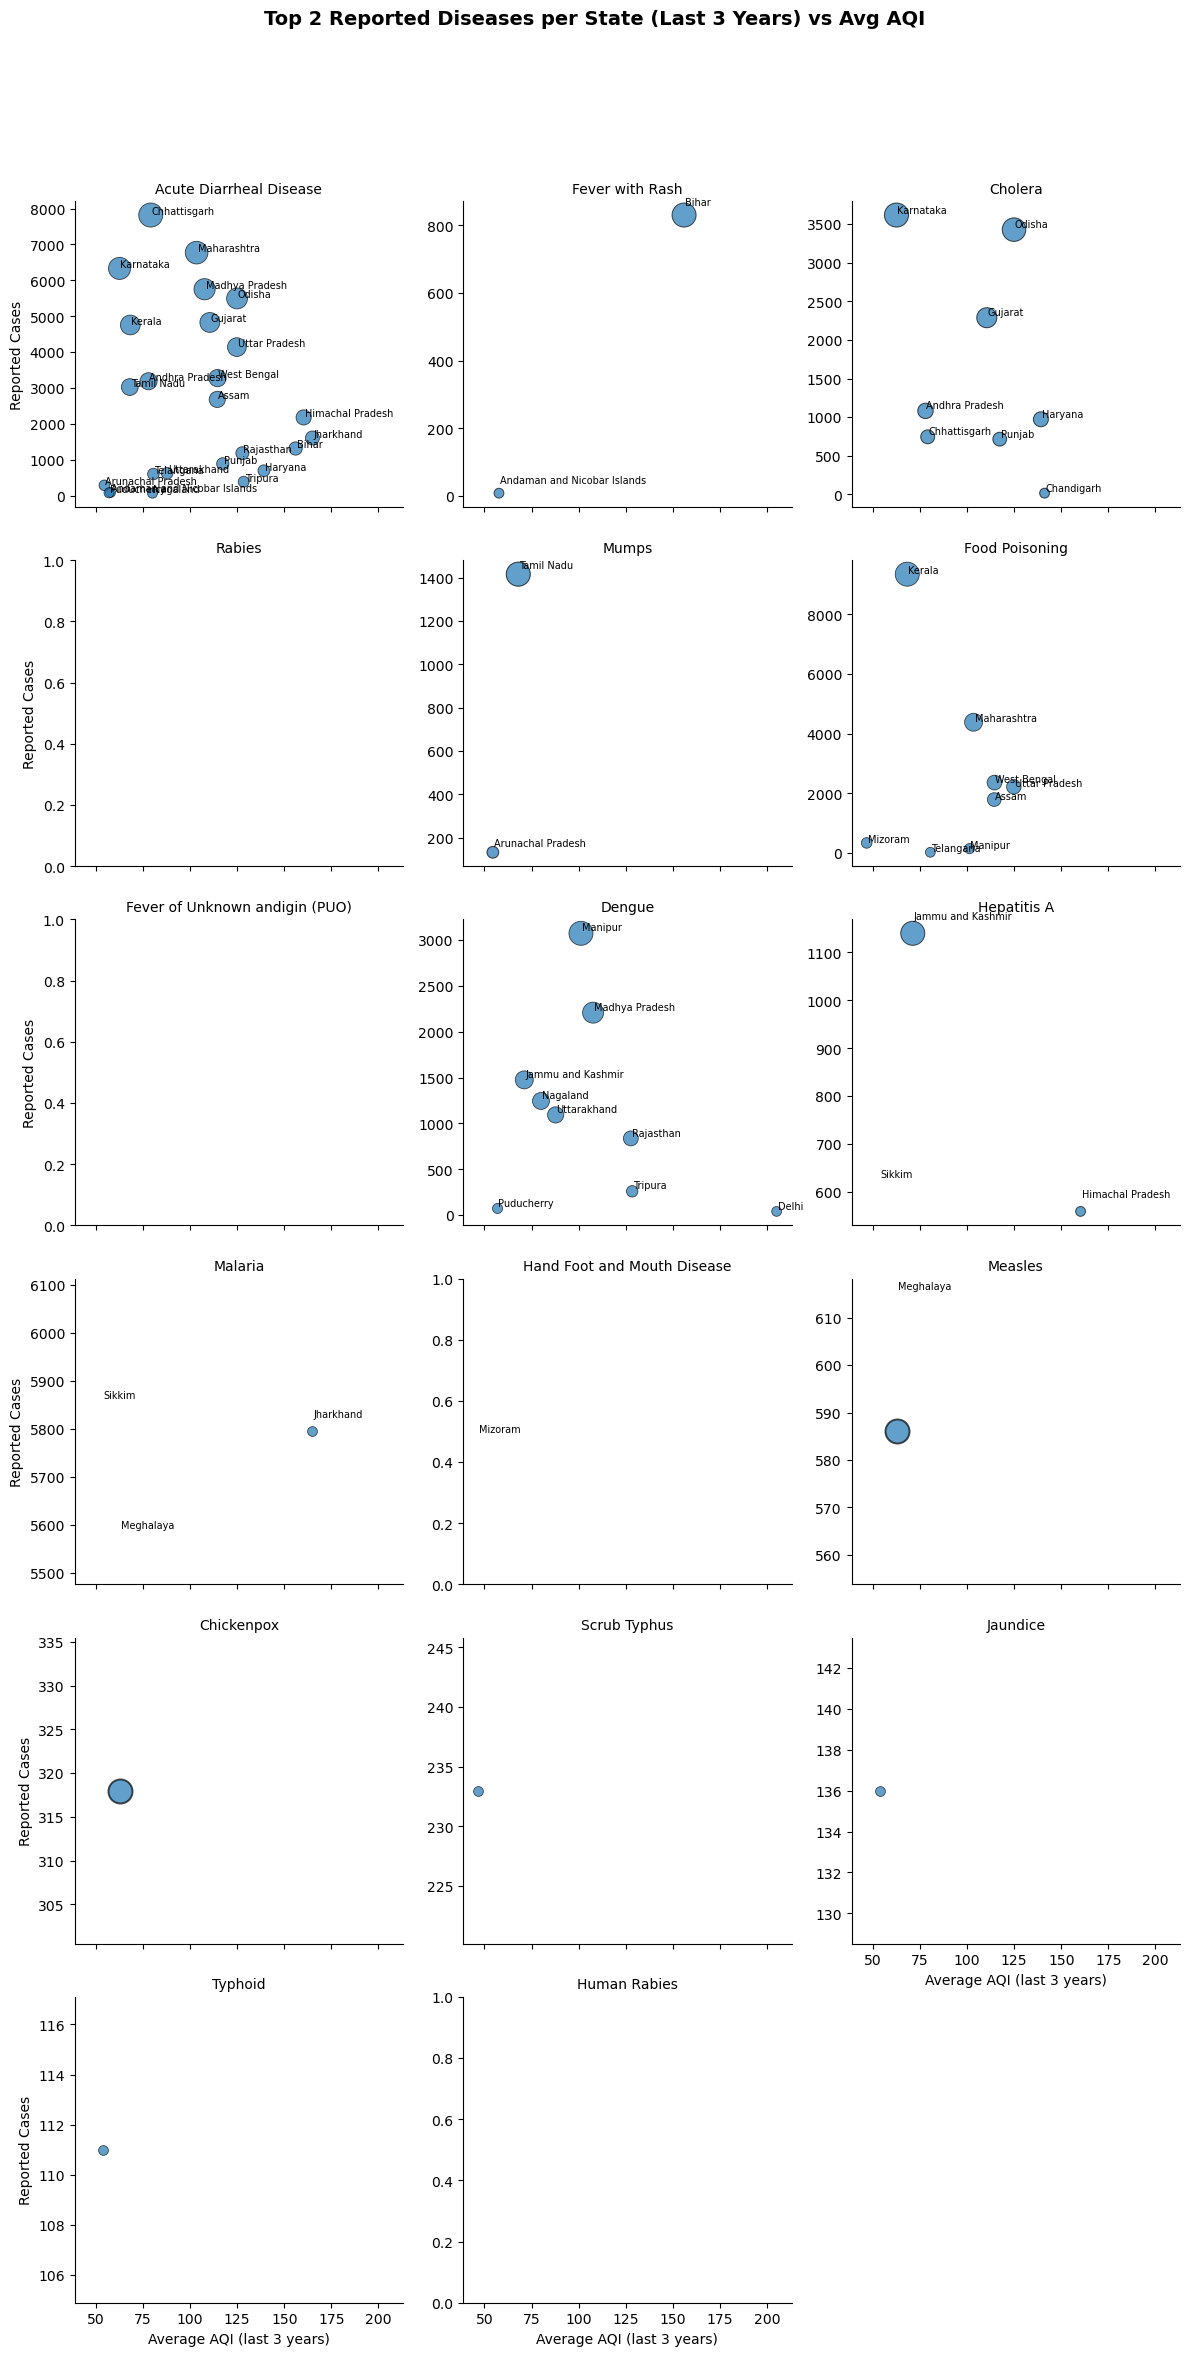

In [33]:
# FacetGrid: one subplot per disease
g = sns.FacetGrid(final_result, col="disease_illness_name", col_wrap=3, height=4, sharey=False, sharex=True)

g.map_dataframe(sns.scatterplot, x="avg_aqi", y="cases", size="cases", sizes=(50,300), alpha=0.7, edgecolor="k")

# Add state labels
for ax in g.axes.flatten():
    data_ax = final_result[final_result["disease_illness_name"] == ax.get_title().split(" = ")[1]]
    for i, row in data_ax.iterrows():
        ax.text(row["avg_aqi"]+0.5, row["cases"]+30, row["state"], fontsize=7)

g.set_axis_labels("Average AQI (last 3 years)", "Reported Cases")
g.set_titles("{col_name}")
plt.subplots_adjust(top=0.9)
g.fig.suptitle("Top 2 Reported Diseases per State (Last 3 Years) vs Avg AQI", fontsize=14, weight="bold")

plt.show()

*8.) List the top 5 states with high EV adoption and analyse if their average AQI is significantly better compared to states with lower EV adoption*

In [35]:
# Filter only Electric vehicles
ev_only = vahan_data[vahan_data['fuel'].str.contains("ELECTRIC", case=False, na=False)]

# Sum EV adoption per state (latest year available)
latest_year = ev_only['year'].max()
ev_latest = (ev_only[ev_only['year'] == latest_year].groupby('state')['value'].sum().reset_index(name='ev_count').sort_values('ev_count', ascending=False))

# Top 5 and bottom states by EV adoption
top5_states = ev_latest.head(5)['state'].tolist()
bottom5_states = ev_latest.tail(5)['state'].tolist()

# Average AQI per state
aqi_recent = aqi_data[aqi_data['date'] >= (aqi_data['date'].max() - pd.DateOffset(years=1))]
state_aqi = aqi_recent.groupby('state')['aqi_value'].mean().reset_index(name='avg_aqi').sort_values('avg_aqi', ascending=False)

# Merge AQI with EV data
ev_aqi = ev_latest.merge(state_aqi, on='state', how='left')

# Separate top vs bottom
top5_aqi = ev_aqi[ev_aqi['state'].isin(top5_states)]
bottom5_aqi = ev_aqi[ev_aqi['state'].isin(bottom5_states)]

print("Top 5 States\n",top5_aqi)
print("bottom 5 States\n",bottom5_aqi)

Top 5 States
            state  ev_count     avg_aqi
0  Uttar Pradesh     79547  116.308819
1          Bihar     22308  126.999108
2          Delhi     18297  205.912329
3      Karnataka     17618   58.715418
4          Assam     16205  103.231738
bottom 5 States
                                        state  ev_count    avg_aqi
28  Dadra and Nagar Haveli and Daman and Diu        34        NaN
29               Andaman and Nicobar Islands        14  57.706897
30                         Arunachal Pradesh        10  57.300971
31                               Lakshadweep         2        NaN
32                                  Nagaland         1  77.331210


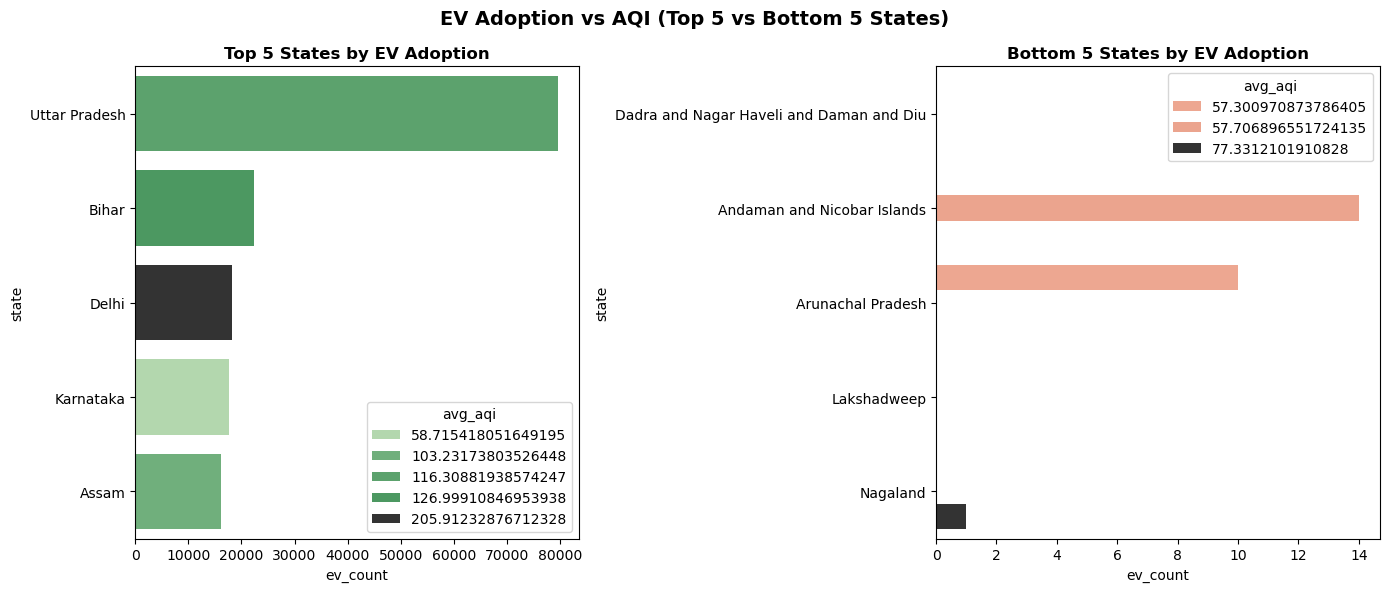

In [36]:
plt.figure(figsize=(14,6))
# Top 5 states
plt.subplot(1, 2, 1)
sns.barplot(data=top5_aqi, x="ev_count", y="state",hue="avg_aqi", palette="Greens_d")
plt.title("Top 5 States by EV Adoption", fontsize=12, weight="bold")
# Bottom 5 states
plt.subplot(1, 2, 2)
sns.barplot(data=bottom5_aqi, x="ev_count", y="state",hue="avg_aqi", palette="Reds_d")
plt.title("Bottom 5 States by EV Adoption", fontsize=12, weight="bold")
plt.suptitle("EV Adoption vs AQI (Top 5 vs Bottom 5 States)", fontsize=14, weight="bold")
plt.tight_layout()
plt.show()

*9.) Severity Mapping: Identify cities experiencing persistent or worsening AQI (Air Quality Index) levels.*

In [80]:
# Question 6: Severity Mapping - cities with persistent or worsening AQI, count unhealthy+ days
from scipy.stats import linregress
from datetime import datetime
aqi_data['unhealthy'] = aqi_data['aqi_value'] >= 151
unhealthy_days = aqi_data.groupby('area')['unhealthy'].sum()
trends = {}
for area, group in aqi_data.groupby('area'):
    if len(group) < 10: continue
    group = group.sort_values('date')
    x = (group['date'] - group['date'].min()).dt.days.values
    y = group['aqi_value'].values
    slope, _, _, _, _ = linregress(x, y)
    trends[area] = {'slope': slope, 'persistent': group['aqi_value'].mean() > 100}
print("Trends (sample):\n")
pd.DataFrame(dict(list(trends.items())[:5]))

Trends (sample):



,Agartala,Agra,Ahmedabad,Ahmednagar,Aizawl
slope,0.03893,-0.001423,0.01113,0.192108,0.013389
persistent,True,False,True,True,False


In [78]:
print("Unhealthy Days (Top 10):\n")
pd.DataFrame(unhealthy_days.sort_values(ascending=False).head(10))

Unhealthy Days (Top 10):



,unhealthy
area,
Greater Noida,750
Delhi,730
Gurugram,724
Bhiwadi,659
Ghaziabad,657
NOIDA,643
Faridabad,622
Patna,618
Muzaffarnagar,571


*10.) Health Impact Correlation - correlate AQI spikes with health events*

In [67]:
 air_related = ['Chickenpox', 'Fever with Rash', 'Measles', 'Acute Diarrheal Disease']
idsp_filtered = idsp_data[idsp_data['disease_illness_name'].isin(air_related)]
health_monthly = idsp_filtered.groupby(['state', 'year', 'month'])['cases'].sum().reset_index(name='health_events')
aqi_monthly = aqi_data.groupby(['state', 'year', 'month'])['aqi_value'].agg(['mean', lambda x: (x > 200).sum()]).reset_index()
aqi_monthly.columns = ['state', 'year', 'month', 'avg_aqi', 'spikes']
merged = pd.merge(aqi_monthly, health_monthly, on=['state', 'year', 'month'], how='inner')
# Filter groups with enough data for correlation (at least 2 rows and non-zero variance)
merged = merged.groupby('state').filter(lambda g: len(g) >= 2 and g['avg_aqi'].var() > 0 and g['health_events'].var() > 0)
overall_corr = merged['avg_aqi'].corr(merged['health_events']) if not merged.empty else np.nan
state_corrs = merged.groupby('state').apply(
    lambda g: g[['avg_aqi', 'health_events']].corr().iloc[0, 1], include_groups=False
).dropna()
print("Overall Correlation:", overall_corr,"\n")
print("State Correlations:\n", state_corrs)

Overall Correlation: -0.14838313305561443 

State Correlations:
 state
Andhra Pradesh      -0.309552
Arunachal Pradesh   -0.244330
Assam               -0.216590
Bihar               -0.538336
Chhattisgarh        -0.471196
Gujarat             -0.217269
Haryana             -0.130042
Himachal Pradesh    -0.075137
Jammu and Kashmir   -0.638977
Jharkhand           -0.169634
Karnataka           -0.153381
Kerala               0.242371
Madhya Pradesh      -0.473881
Maharashtra         -0.088981
Manipur              0.066144
Meghalaya           -0.331755
Mizoram              0.108097
Nagaland            -0.279779
Odisha              -0.297676
Puducherry          -0.288905
Punjab              -0.076286
Rajasthan            0.020170
Sikkim              -1.000000
Tamil Nadu          -0.226025
Telangana           -0.217908
Tripura             -0.017199
Uttar Pradesh       -0.355552
Uttarakhand          0.003424
West Bengal          0.020061
dtype: float64


*11.) Demand Triggers: Examine the relationship between pollution spikes and shifts in consumer behavior related to air purifier demand.*

In [76]:
vahan_monthly = vahan_data.groupby(['state', 'year', 'month'])['value'].sum().reset_index(name='registrations')
vahan_monthly['growth'] = vahan_monthly.groupby('state')['registrations'].pct_change().fillna(0)
merged_q8 = pd.merge(aqi_monthly, vahan_monthly, on=['state', 'year', 'month'], how='inner')
spike_growth_corr = merged_q8['spikes'].corr(merged_q8['growth'])
print("Spike-Growth Correlation:", spike_growth_corr)

Spike-Growth Correlation: nan


*12.) Market size proxies using vahan and popu for top states (2025)*

In [136]:
popu_2025 = popu_data[(popu_data['year'] == 2025) & (popu_data['gender'] == 'Total')].groupby('state')['value'].sum().reset_index(name='population_thousands')
popu_2025['population'] = popu_2025['population_thousands'] * 1000
vahan_2025 = vahan_data[vahan_data['year'] == 2025].groupby('state')['value'].sum().reset_index(name='total_vehicles')
merged_q9 = pd.merge(vahan_2025, popu_2025, on='state', how='inner')
merged_q9['per_capita_vehicles'] = merged_q9['total_vehicles'] / merged_q9['population']
aqi_2025 = aqi_data[aqi_data['year'] == 2025]
high_days = aqi_2025[aqi_2025['aqi_value'] > 150].groupby('state')['date'].nunique().reset_index(name='high_aqi_days')
merged_q9 = pd.merge(merged_q9, high_days, on='state', how='left').fillna(0)
merged_q9['aqi_burden'] = merged_q9['high_aqi_days'] * merged_q9['population'] / 1e6
merged_q9['households'] = merged_q9['population'] / 4.5
merged_q9['vehicles_per_hh'] = merged_q9['total_vehicles'] / merged_q9['households']
top_states_q9 = merged_q9.sort_values('aqi_burden', ascending=False).head(10)
print("Top States Proxies:\n")
top_states_q9

Top States Proxies:



,state,total_vehicles,population_thousands,population,per_capita_vehicles,high_aqi_days,aqi_burden,households,vehicles_per_hh
19,Maharashtra,1028348,189698,189698000,0.005421,101.0,19159.498,4.215511e+07,0.024394
31,Uttar Pradesh,1286661,176247,176247000,0.007300,104.0,18329.688,3.916600e+07,0.032851
33,West Bengal,390232,113481,113481000,0.003439,93.0,10553.733,2.521800e+07,0.015474
18,Madhya Pradesh,526548,78047,78047000,0.006747,107.0,8351.029,1.734378e+07,0.030359
27,Rajasthan,473533,67110,67110000,0.007056,117.0,7851.870,1.491333e+07,0.031752
7,Delhi,243260,66635,66635000,0.003651,102.0,6796.770,1.480778e+07,0.016428
14,Karnataka,600589,93769,93769000,0.006405,71.0,6657.599,2.083756e+07,0.028822
9,Gujarat,570097,109932,109932000,0.005186,59.0,6485.988,2.442933e+07,0.023337
29,Tamil Nadu,695868,127022,127022000,0.005478,47.0,5970.034,2.822711e+07,0.024652
4,Bihar,443359,48968,48968000,0.009054,113.0,5533.384,1.088178e+07,0.040743


3.) Which pollution control policies introduced by the Indian government in the past 5 years have had the most measurable impact on improving air quality
— and how have these impacts varied across regions or cities?

Ans:-

Over the past five years, the Indian government has implemented several air pollution control policies that have had varying degrees of success across 
different regions.

Key Policies and Their Impacts:

1. National Clean Air Programme (NCAP): Launched to reduce particulate matter (PM2.5 and PM10) levels by 40% by 2026 compared to 2017 levels. This 
   program has led to improvements in air quality in several cities, though results have been mixed. For instance, Indore and Jabalpur in Madhya 
   Pradesh have shownsignificant improvements, while Bengaluru's air quality has worsened due to increasing vehicular emissions and road dust. 
   "The Times of India"


2. Swachh Vayu Survekshan: An annual air quality assessment that ranks cities based on their air quality improvements. Cities like Agra, Kanpur, and
   Prayagraj have made notable progress, while others like Ghaziabad have also improved their rankings due to measures like dust control and green
   initiatives. "The Times of India"

3. Stubble Burning Control Measures: In states like Punjab, Haryana, and Uttar Pradesh, efforts to reduce stubble burning have been ongoing. While 
   some progress has been made, challenges remain due to the practice's prevalence and its contribution to seasonal air pollution. "Wikipedia"

Regional Variations:

. North India: Cities like Delhi continue to face severe air quality issues, with PM2.5 levels often exceeding safe limits. Despite various policies, 
  the region struggles with high pollution levels due to factors like vehicular emissions and crop residue burning. Climate Growth Institute

. South India: States like Karnataka have shown mixed results. While some cities have improved air quality, others like Bengaluru have seen a decline 
  due to rising vehicular emissions and road dust. The Times of India

Conclusion:

While the Indian government's policies have led to improvements in air quality in certain regions, challenges persist, particularly in areas with high 
vehicular emissions and industrial pollution. Continued efforts and stricter enforcement of regulations are necessary to achieve significant and 
sustained improvements in air quality across the country.